#Regression

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/STATS201_Aida/main/data/owid-energy-data.csv')
df.head(5)

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN


## Data Processing

In [3]:
# Exclude regions that are not countries
# Define patterns to exclude
exclude_patterns = ['\(EI\)', '\(EIA\)', '\(Ember\)', '\(Shift\)', 'Europe', 'European Union (27)' ]

# Create a boolean mask for rows that don't contain any of the exclusion patterns
mask = ~df['country'].str.contains('|'.join(exclude_patterns))

# Apply the mask to filter out rows
filtered_df = df[mask]

# Now, 'filtered_df' contains rows where the 'country' does not contain the exclusion patterns
filtered_df

<ipython-input-3-de15bd85cadf>:6: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mask = ~df['country'].str.contains('|'.join(exclude_patterns))


,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
23,Afghanistan,1900,AFG,4707744.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,Afghanistan,1901,AFG,4751177.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,Afghanistan,1902,AFG,4802500.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,Afghanistan,1903,AFG,4861833.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,Afghanistan,1904,AFG,4921891.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21585,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,NaN,NaN,NaN,NaN,25.910,...,0.218,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
21586,Zimbabwe,2019,ZWE,15354606.0,NaN,NaN,NaN,NaN,NaN,24.748,...,0.364,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
21587,Zimbabwe,2020,ZWE,15669663.0,NaN,NaN,NaN,NaN,NaN,22.336,...,0.395,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
21588,Zimbabwe,2021,ZWE,15993525.0,NaN,NaN,NaN,NaN,NaN,23.760,...,0.498,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN


In [4]:
# Group by "country" and calculate the mean
filtered_df = filtered_df.groupby("country").mean().reset_index()
filtered_df

<ipython-input-4-216cfbd70b26>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  filtered_df = filtered_df.groupby("country").mean().reset_index()


,country,year,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,Afghanistan,1960.5,1.264643e+07,2.146437e+10,NaN,NaN,NaN,NaN,0.000000,0.000000,...,1.951227,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN
1,Africa,1961.0,4.560140e+08,NaN,54.719950,0.035062,0.340758,0.392909,2.709727,2.947273,...,0.291526,0.086077,60.830138,1.092912,7.207879,2.044569,2.611879,5.641328,0.506921,0.137810
2,Albania,1960.5,1.956667e+06,1.190926e+10,NaN,NaN,NaN,NaN,0.000000,0.000000,...,0.054156,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN
3,Algeria,1961.0,1.671386e+07,1.674016e+11,NaN,NaN,NaN,NaN,0.000000,0.000000,...,0.166939,0.050758,220.749625,0.000875,0.008545,0.080485,0.003333,0.206121,0.004697,0.001303
4,American Samoa,2000.5,4.997719e+04,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,...,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,World,1961.0,3.811038e+09,4.722722e+13,9.494211,20.880263,42.614190,298.501086,49.910565,363.986087,...,0.609868,0.175052,47.381636,96.273702,696.348500,34.485845,260.139224,92.451621,1.604632,0.450138
233,Yemen,2001.0,1.997416e+07,7.054024e+10,NaN,NaN,NaN,NaN,0.000000,0.000000,...,3.246500,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN
234,Yugoslavia,1945.5,1.772551e+07,9.261816e+10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
235,Zambia,1961.0,5.543610e+06,1.571914e+10,NaN,NaN,NaN,NaN,3.616864,0.059091,...,0.120818,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN


In [5]:
# Get unique country names from the 'country' column
unique_countries = filtered_df['country'].unique()
print(unique_countries)

['Afghanistan' 'Africa' 'Albania' 'Algeria' 'American Samoa' 'Angola'
 'Antarctica' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Asia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'British Virgin Islands' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burundi'
 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba'
 'Curacao' 'Cyprus' 'Czechia' 'Czechoslovakia'
 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'East Germany' 'East Timor' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Falkland Islands' 'Faroe Islands' 'Fiji' 'Finland' 'France'
 'French Guiana' 'French Polynesia' 'Gabon' 'Gambia' 'Georgia' 'Germany

In [6]:
# Address missing values
filtered_df = filtered_df.dropna(subset=['energy_per_capita'])
filtered_df["energy_per_capita"]

0        910.744333
1       3679.928241
2      11497.375262
3      10146.486586
4      42153.881310
           ...     
232    18031.288069
233     3019.903833
234    34577.956333
235     3810.350952
236     4495.943357
Name: energy_per_capita, Length: 234, dtype: float64

In [7]:
# Confirm relevant variables are numerical
filtered_df.dtypes

country                     object
year                       float64
population                 float64
gdp                        float64
biofuel_cons_change_pct    float64
                            ...   
wind_elec_per_capita       float64
wind_electricity           float64
wind_energy_per_capita     float64
wind_share_elec            float64
wind_share_energy          float64
Length: 128, dtype: object

In [8]:
# Create variable gdp_per_capita
filtered_df["gdp_per_capita"] = filtered_df["gdp"]/filtered_df["population"]
filtered_df = filtered_df.dropna(subset=['gdp_per_capita'])
filtered_df

<ipython-input-8-c1b60e86a168>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["gdp_per_capita"] = filtered_df["gdp"]/filtered_df["population"]


,country,year,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,...,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy,gdp_per_capita
0,Afghanistan,1960.5,1.264643e+07,2.146437e+10,NaN,NaN,NaN,NaN,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN,1697.266675
2,Albania,1960.5,1.956667e+06,1.190926e+10,NaN,NaN,NaN,NaN,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN,6086.503746
3,Algeria,1961.0,1.671386e+07,1.674016e+11,NaN,NaN,NaN,NaN,0.000000,0.000000,...,0.050758,220.749625,0.000875,0.008545,0.080485,0.003333,0.206121,0.004697,0.001303,10015.733229
5,Angola,1961.0,9.336763e+06,3.792500e+10,NaN,NaN,NaN,NaN,1.909545,0.057273,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN,4061.900655
8,Argentina,1961.0,2.258009e+07,2.681517e+11,10.026917,0.667417,299.19500,13.072538,28.496957,1.205217,...,0.062000,79.056154,1.154031,3.731242,32.059000,1.438576,83.060273,1.026364,0.393667,11875.585276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,World,1961.0,3.811038e+09,4.722722e+13,9.494211,20.880263,42.61419,298.501086,49.910565,363.986087,...,0.175052,47.381636,96.273702,696.348500,34.485845,260.139224,92.451621,1.604632,0.450138,12392.218283
233,Yemen,2001.0,1.997416e+07,7.054024e+10,NaN,NaN,NaN,NaN,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN,3531.574964
234,Yugoslavia,1945.5,1.772551e+07,9.261816e+10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5225.134341
235,Zambia,1961.0,5.543610e+06,1.571914e+10,NaN,NaN,NaN,NaN,3.616864,0.059091,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN,2835.541273


## Model Training

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [10]:
# Define dependent and independent variables
X = filtered_df["gdp_per_capita"]
y = filtered_df['energy_per_capita']

In [11]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
# Convert the Pandas Series to a NumPy array
X_train_np = X_train.to_numpy()

# Reshape the array
X_train_reshaped = X_train_np.reshape(-1, 1)

In [13]:
# Random Forest
rf_model = RandomForestRegressor(random_state = 123)
rf_model.fit(X_train_reshaped, y_train)

RandomForestRegressor(random_state=123)

In [14]:
# Linear Regression
lr_model = LinearRegression()
lr_model= lr_model.fit(X_train_reshaped, y_train)

In [15]:
# Random Forest
rf_y_pred = rf_model.predict(X_test.values.reshape(-1, 1))
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_y_pred))

print(rf_y_pred)
print("RMSE:", rf_rmse)

[25867.86161942 39575.7012682  74790.16571897  7448.80441871
 25790.14789149   778.71403119 40361.87115447  8448.31539802
   557.65220595 85078.14548837 18750.43753483 56995.14295286
 56995.14295286 17185.74569252 68291.61027542  7932.03296866
 49206.06468422 14570.0180444  17820.29621744 21104.26633878
 57400.7252234  52112.96610662 39538.19108476  7710.22570167
   683.5862569  12380.04994484   620.51431048 66263.30866241
 12464.20252094 12380.04994484 18544.74370629  3892.55929357
 34733.27627786 27898.58502618]
RMSE: 16862.878253583935


In [16]:
# Linear Regression
lr_y_pred = lr_model.predict(X_test.values.reshape(-1, 1))
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_y_pred))

print(lr_y_pred)
print("RMSE:", lr_rmse)

[22399.05896478 18777.22164775 46145.42259801 14635.11561499
 25543.2728571   6491.40520072 33090.81206815 16632.97148032
  6875.07471491 63462.12013919 26280.48134439 35257.53109862
 35196.01394424 15379.05708171 58096.66786444 14687.84558763
 31727.4294628  20285.87258141 28566.71492153 27122.83427164
 37136.82004808 41150.54272001 18547.29063615  9501.83014898
  7069.71074216 20690.06494829  6362.72999407 48938.60304657
 21333.43162231 20691.34420713 19922.732484    9935.16038039
 22682.591822   29927.70867683]
RMSE: 12291.672838247365


## Model Evaluation & Visualizations

In [17]:
lr_r2 = r2_score(y_test, lr_y_pred)
print(f'R2 Score: {lr_r2}')

R2 Score: 0.6411474215142314


In [18]:
lr_y_pred = pd.DataFrame(np.array(lr_y_pred).astype(float),columns=['lr_y_pred'])
lr_y_pred

,lr_y_pred
0,22399.058965
1,18777.221648
2,46145.422598
3,14635.115615
4,25543.272857
5,6491.405201
6,33090.812068
7,16632.971480
8,6875.074715
9,63462.120139


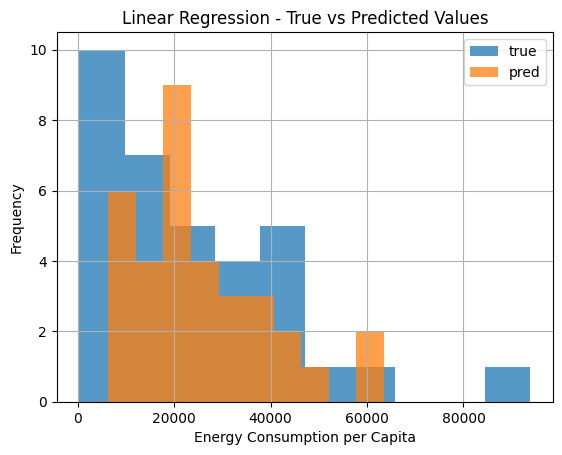

In [20]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
lr_y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
plt.title('Linear Regression - True vs Predicted Values')
plt.xlabel('Energy Consumption per Capita')
plt.ylabel('Frequency')

plt.show()


In [22]:
rf_y_pred = pd.DataFrame(np.array(rf_y_pred).astype(float),columns=['rf_y_pred'])
rf_y_pred

,rf_y_pred
0,25867.861619
1,39575.701268
2,74790.165719
3,7448.804419
4,25790.147891
5,778.714031
6,40361.871154
7,8448.315398
8,557.652206
9,85078.145488


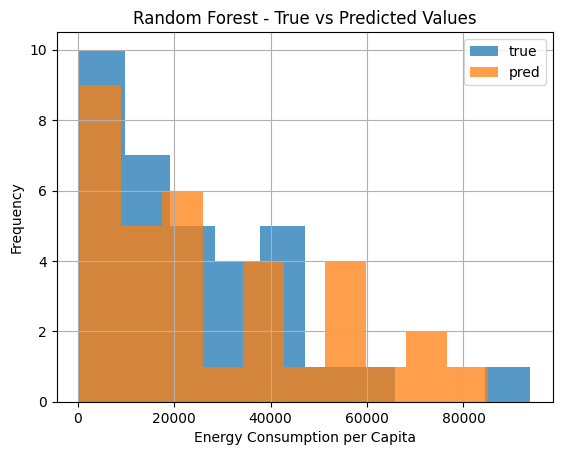

In [43]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
rf_y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
plt.title('Random Forest - True vs Predicted Values')
plt.xlabel('Energy Consumption per Capita')
plt.ylabel('Frequency')

plt.show()


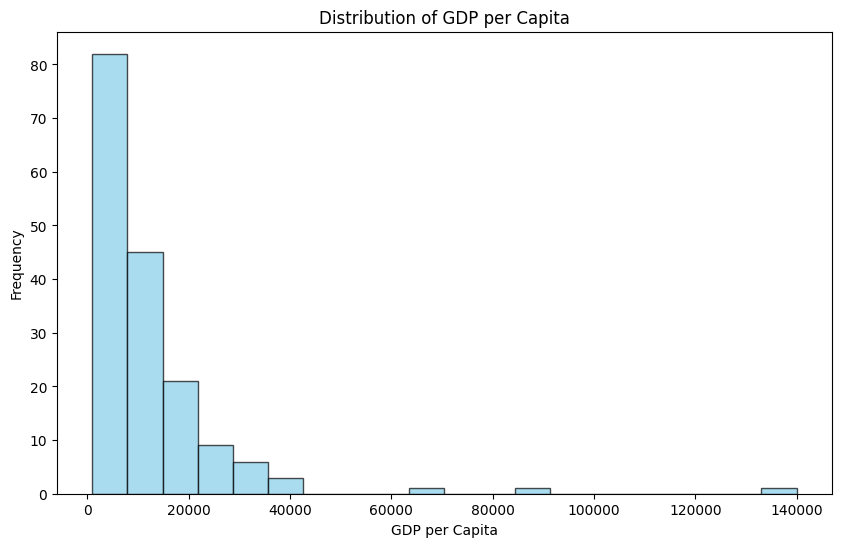

In [25]:
plt.figure(figsize=(10, 6))
plt.hist(filtered_df['gdp_per_capita'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('GDP per Capita')
plt.ylabel('Frequency')
plt.title('Distribution of GDP per Capita')
plt.show()

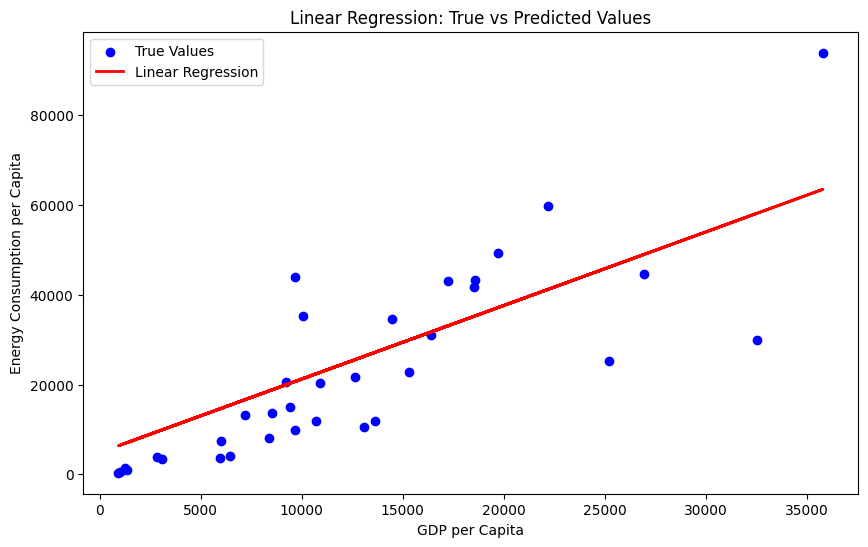

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='True Values')
plt.plot(X_test, lr_y_pred, color='red', linewidth=2, label='Linear Regression')
plt.xlabel('GDP per Capita')
plt.ylabel('Energy Consumption per Capita')
plt.title('Linear Regression: True vs Predicted Values')
plt.legend()
plt.show()

In [27]:
print("Shape of y_test:", y_test.shape)
print("Shape of lr_y_pred:", lr_y_pred.shape)

Shape of y_test: (34,)
Shape of lr_y_pred: (34, 1)


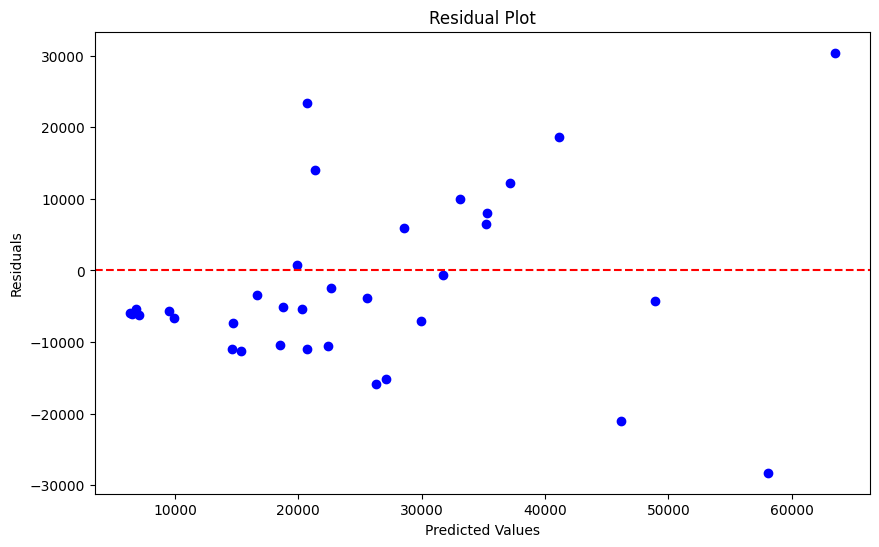

In [28]:
# Reshape lr_y_pred to match the shape of y_test
lr_y_pred = lr_y_pred.values.flatten()

# Create a DataFrame with an index
residual_df = pd.DataFrame({'lr_y_pred': lr_y_pred, 'residuals': y_test.values - lr_y_pred}, index=y_test.index)

# Sort the DataFrame by lr_y_pred
sorted_residual_df = residual_df.sort_values(by='lr_y_pred')

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.scatter(sorted_residual_df['lr_y_pred'], sorted_residual_df['residuals'], color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

## More Visualizations to understand the variables

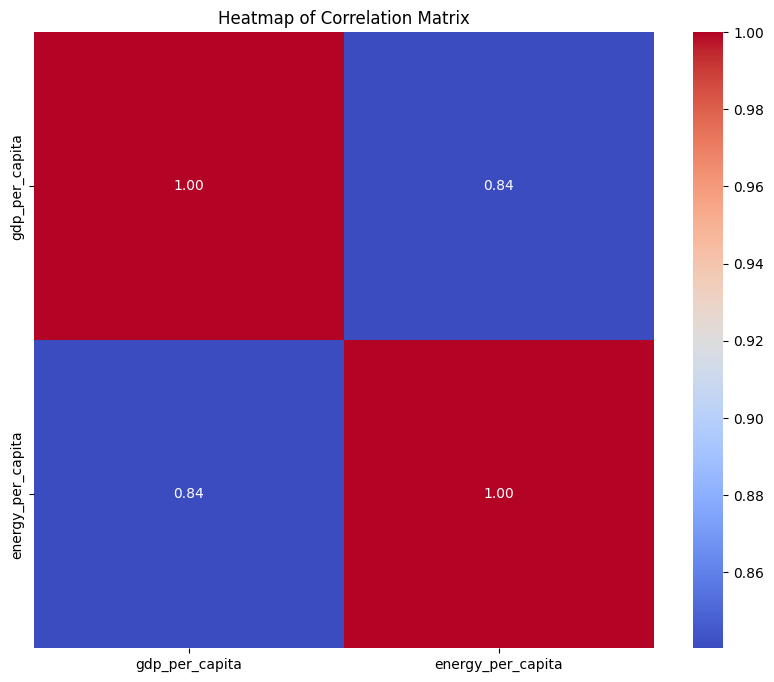

In [30]:
import seaborn as sns

# Select relevant columns
relevant_columns = ['gdp_per_capita', 'energy_per_capita']

# Calculate correlation matrix for the relevant columns
corr_matrix = filtered_df[relevant_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Matrix')
plt.show()


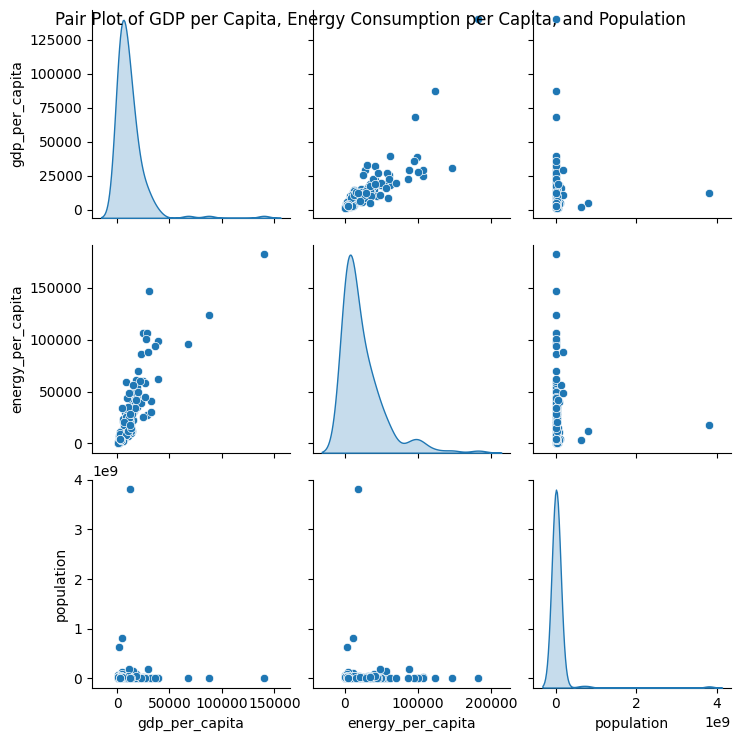

In [31]:
sns.pairplot(filtered_df, vars=['gdp_per_capita', 'energy_per_capita', 'population'], diag_kind='kde')
plt.suptitle('Pair Plot of GDP per Capita, Energy Consumption per Capita, and Population')
plt.show()

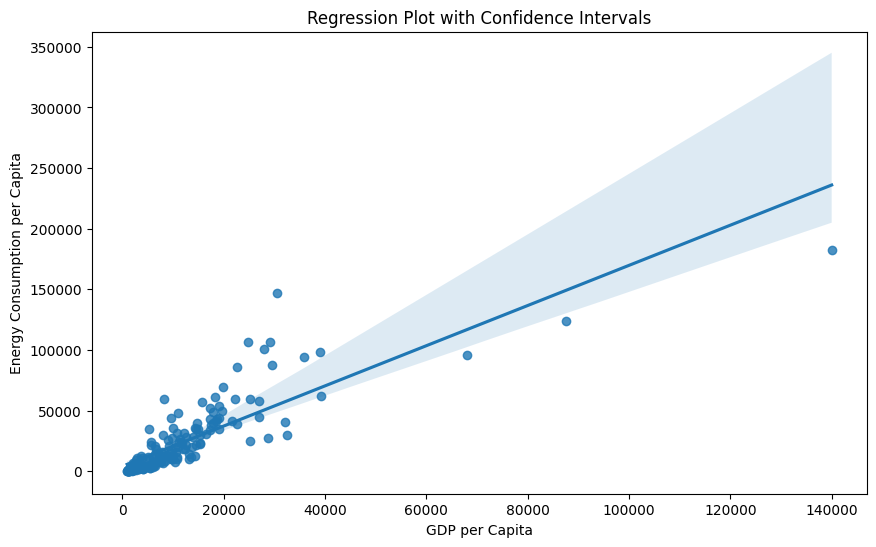

In [32]:
plt.figure(figsize=(10, 6))
sns.regplot(x='gdp_per_capita', y='energy_per_capita', data= filtered_df, ci=95)
plt.xlabel('GDP per Capita')
plt.ylabel('Energy Consumption per Capita')
plt.title('Regression Plot with Confidence Intervals')
plt.show()

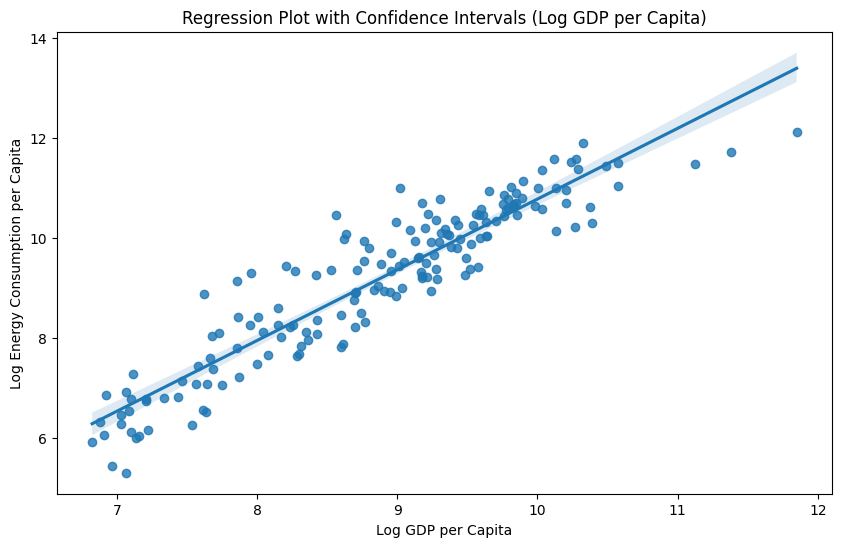

In [33]:
import numpy as np

# Log-transform GDP per capita
filtered_df['log_gdp_per_capita'] = np.log(filtered_df['gdp_per_capita'])
filtered_df['log_energy_per_capita'] = np.log(filtered_df['energy_per_capita'])

# Plot the regression plot with log-transformed GDP per capita
plt.figure(figsize=(10, 6))
sns.regplot(x='log_gdp_per_capita', y='log_energy_per_capita', data=filtered_df, ci=95)
plt.xlabel('Log GDP per Capita')
plt.ylabel('Log Energy Consumption per Capita')
plt.title('Regression Plot with Confidence Intervals (Log GDP per Capita)')
plt.show()
